<a href="https://colab.research.google.com/github/jokerkeny/NPDBresearch/blob/main/NPDBresearchEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# # This section is just for myself data loading. Just ignore it^_^ 
# from google.colab import drive
# drive.mount('/content/drive')
# !cp /content/drive/MyDrive/码上青楼/yy/万塔基/NPDBresearch/NPDB2101.CSV ./

Mounted at /content/drive


# EDA
This is just a primitive analysis of the NPDB data.

## Data Loading

The data could be downloaded from [NPDB](https://www.npdb.hrsa.gov/resources/publicData.jsp), put it under the folder with the notebook.  
Alternatively, you can just run the following code to download it from S3, where I previously uploaded onto for convenience. 

In [25]:
import os
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

# if there is no data file in current folder, it will try to download it from S3. 
# Actually I can compress/decompress it using bz2. 
if not os.path.isfile("./NPDB2101.CSV"):
    print("Beginning file download with requests")
    print("The data file is 184 MB, so it may takes tens of seconds to download it depending on your Internet speed")
    url = "https://kenyang.s3.amazonaws.com/DEchallenge/NPDB2101.CSV"
    r = requests.get(url)
    with open("NPDB2101.CSV", "wb") as f:
        f.write(r.content)

df = pd.read_csv("./NPDB2101.CSV")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (18,19,20,22,23,25,26,33,34,35,36,37,38) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Variables and Data Cleaning

In [26]:
len(df.columns)

54

In [27]:
len(df)

1572231

We can see, there are 54 columns, 1572231 rows in the dataset. 

Following briefly list the variables' meaning. 

For variables' detail, see *PublicUseDataFile-Format.pdf* . Reading this document would give out better understanding of all variables.

Variable |Type |Variable Label 
--|--|--
seqno |Numeric |Sequence Number -- Unique to Each Record 
rectype |String |Record Type 
reptype |Numeric |Report Type 
origyear |Numeric |Year original report processed 
workstat |String |Practitioners Work State 
workctry |String |Practitioners Work Country 
homestat |String |Practitioners Home State 
homectry |String |Practitioners Home Country 
licnstat |String |Practitioners State of License (First Listed) 
licnfeld |Numeric |Practitioners Field of License 
practage |Numeric |Age Group of Practitioner 
grad |Numeric |Graduation year group 
algnnatr |Numeric |Malpractice Allegation Group 
alegatn1 |Numeric |Specific Malpractice Allegation 1 
alegatn2 |Numeric |Specific Malpractice Allegation 2 
outcome |Numeric |Severity of Alleged Malpractice Injury [available for use1/31/2004]
malyear1 |Numeric |Year of Act or Omission 1 
malyear2 |Numeric |Year of Act or Omission 2 
payment |Dollar |Payment Amount (this payment only) 
totalpmt |Dollar |Total Payment by this Payer for This Practitioner[available for use 1/31/2004]
paynumbr |String |Single of Multiple Payment 
numbprsn |Numeric |Number of Practitioners Payment For 
paytype |String |Payment A Result of ... 
pyrrltns |String |Relationship of Paying Entity to the Practitioner[available for use 1/31/2004]
ptage |Numeric |Age Group of Patient [available for use 1/31/2004] 
ptgender |String |Gender of Patient [available for use 1/31/2004] 
pttype |String |Patient Type (Inpatient, Outpatient) 
aayear |Numeric |Year of Adverse Action 
aaclass1 |Numeric |Adverse Action Classification1 [available for use11/22/1999/old records converted]
aaclass2 |Numeric |Adverse Action Classification2 [available for use11/22/1999]
aaclass3 |Numeric |Adverse Action Classification3 [available for use11/22/1999]
aaclass4 |Numeric |Adverse Action Classification4 [available for use11/22/1999]
aaclass5 |Numeric |Adverse Action Classification5 [available for use11/22/1999]
basiscd1 |String |Basis for Action [available for use 11/22/1999] 
basiscd2 |String |Basis for Action2 [available for use 11/22/1999] 
basiscd3 |String |Basis for Action3 [available for use 11/22/1999] 
basiscd4 |String |Basis for Action4 [available for use 11/22/1999] 
basiscd5 |String |Basis for Action5 [available for use 9/9/2002] 
aalentyp |String |Adverse Action Length Type 
aalength |Numeric |Length of Adverse Action Penalty, in Years 
aaefyear |Numeric |Effective Year of Adverse Action 
aasigyr |Numeric |Year of AA Report Signature 
type |Numeric |Entity Type (assigned) 
practnum |Numeric |Practitioner Number Unique to This File 
accrrpts |Numeric |Subjects Number of Accreditation Reports 
npmalrpt |Numeric |Practitioners Number of Malpractice Payment Reportssubmitted under Title IV.
nplicrpt |Numeric |Practitioners Number of Licensure Reports submittedunder Title IV and/or Section 1921
npclprpt |Numeric |Practitioners Number of Clinical Privileges Reportssubmitted under Title IV
nppsmrpt |Numeric |Practitioners Number of Prof. Soc. Membership Reportssubmitted under Title IV
npdearpt |Numeric |Practitioners Number of DEA Reports submitted underTitle IV
npexcrpt |Numeric |Practitioners Number of Exclusion Reports submittedunder Title IV and/or Section 1921
npgarpt |Numeric |Practitioners Number of Government AdministrativeReports submitted under Section 1921
npctmrpt |Numeric |Practitioners Number of Contract Termination Reportssubmitted under Section 1921
fundpymt |Numeric |State Patient Compensation, etc., Fund Payment 


### Distribution and missing data

First, let's have a glance at the data type, distribution, any missing data. Then we can decide whether to perform a Data Cleaning.

In [28]:
# suppress the scientific notation, to make it more readable
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [29]:
df.head()

,SEQNO,RECTYPE,REPTYPE,ORIGYEAR,WORKSTAT,WORKCTRY,HOMESTAT,HOMECTRY,LICNSTAT,LICNFELD,PRACTAGE,GRAD,ALGNNATR,ALEGATN1,ALEGATN2,OUTCOME,MALYEAR1,MALYEAR2,PAYMENT,TOTALPMT,PAYNUMBR,NUMBPRSN,PAYTYPE,PYRRLTNS,PTAGE,PTGENDER,PTTYPE,AAYEAR,AACLASS1,AACLASS2,AACLASS3,AACLASS4,AACLASS5,BASISCD1,BASISCD2,BASISCD3,BASISCD4,BASISCD5,AALENTYP,AALENGTH,AAEFYEAR,AASIGYR,TYPE,PRACTNUM,ACCRRPTS,NPMALRPT,NPLICRPT,NPCLPRPT,NPPSMRPT,NPDEARPT,NPEXCRPT,NPGARPT,NPCTMRPT,FUNDPYMT
0,1,A,301,1991,OK,nan,NaN,nan,OK,10,60.000,1950.000,nan,nan,nan,nan,nan,nan,NaN,NaN,NaN,0.000,NaN,NaN,nan,NaN,NaN,1990.000,1125.000,nan,nan,nan,nan,3,NaN,NaN,NaN,NaN,S,3.000,1990.000,1990.000,300,31049,0,0,2,0,0,0,0,0,0,nan
1,2,A,301,1991,OK,nan,NaN,nan,OK,10,40.000,1960.000,nan,nan,nan,nan,nan,nan,NaN,NaN,NaN,0.000,NaN,NaN,nan,NaN,NaN,1990.000,1125.000,nan,nan,nan,nan,3,NaN,NaN,NaN,NaN,S,5.000,1990.000,1990.000,300,30890,0,0,7,0,0,0,1,0,0,nan
2,4,A,301,1991,MA,nan,NaN,nan,MA,15,30.000,1980.000,nan,nan,nan,nan,nan,nan,NaN,NaN,NaN,0.000,NaN,NaN,nan,NaN,NaN,1990.000,1110.000,nan,nan,nan,nan,99,NaN,NaN,NaN,NaN,P,nan,1990.000,1990.000,300,16981,0,1,1,0,0,0,2,0,0,nan
3,6,A,301,1990,OK,nan,NaN,nan,OK,10,40.000,1970.000,nan,nan,nan,nan,nan,nan,NaN,NaN,NaN,0.000,NaN,NaN,nan,NaN,NaN,1990.000,1125.000,nan,nan,nan,nan,1,NaN,NaN,NaN,NaN,S,5.000,1990.000,1990.000,300,31021,0,0,2,0,0,0,0,0,0,nan
4,8,A,301,1990,OK,nan,NaN,nan,OK,10,40.000,1970.000,nan,nan,nan,nan,nan,nan,NaN,NaN,NaN,0.000,NaN,NaN,nan,NaN,NaN,1990.000,1135.000,nan,nan,nan,nan,1,NaN,NaN,NaN,NaN,I,nan,1990.000,1990.000,300,30912,0,0,8,0,1,0,0,0,0,nan


In [30]:
df.tail()

,SEQNO,RECTYPE,REPTYPE,ORIGYEAR,WORKSTAT,WORKCTRY,HOMESTAT,HOMECTRY,LICNSTAT,LICNFELD,PRACTAGE,GRAD,ALGNNATR,ALEGATN1,ALEGATN2,OUTCOME,MALYEAR1,MALYEAR2,PAYMENT,TOTALPMT,PAYNUMBR,NUMBPRSN,PAYTYPE,PYRRLTNS,PTAGE,PTGENDER,PTTYPE,AAYEAR,AACLASS1,AACLASS2,AACLASS3,AACLASS4,AACLASS5,BASISCD1,BASISCD2,BASISCD3,BASISCD4,BASISCD5,AALENTYP,AALENGTH,AAEFYEAR,AASIGYR,TYPE,PRACTNUM,ACCRRPTS,NPMALRPT,NPLICRPT,NPCLPRPT,NPPSMRPT,NPDEARPT,NPEXCRPT,NPGARPT,NPCTMRPT,FUNDPYMT
1572226,1961424,C,302,2007,NaN,nan,FL,nan,CA,100,40.000,2000.000,nan,nan,nan,nan,nan,nan,NaN,NaN,NaN,0.000,NaN,NaN,nan,NaN,NaN,2004.000,1125.000,nan,nan,nan,nan,E3,F2,F5,H6,NaN,S,3.000,2004.000,2021.000,300,293258,0,0,5,0,0,0,1,0,0,nan
1572227,1961425,C,302,2021,NaN,nan,AL,nan,AL,100,30.000,2010.000,nan,nan,nan,nan,nan,nan,NaN,NaN,NaN,0.000,NaN,NaN,nan,NaN,NaN,2021.000,1173.000,1140.000,nan,nan,nan,29,NaN,NaN,NaN,NaN,I,nan,2012.000,2021.000,300,828172,0,0,1,0,0,0,0,0,0,nan
1572228,1961426,C,302,2017,NaN,nan,OR,nan,OR,100,40.000,1990.000,nan,nan,nan,nan,nan,nan,NaN,NaN,NaN,0.000,NaN,NaN,nan,NaN,NaN,2017.000,1173.000,nan,nan,nan,nan,24,NaN,NaN,NaN,NaN,NaN,nan,2017.000,2021.000,300,718771,0,0,1,0,0,0,0,0,0,nan
1572229,1961427,C,302,2020,NaN,nan,OR,nan,OR,100,70.000,1990.000,nan,nan,nan,nan,nan,nan,NaN,NaN,NaN,0.000,NaN,NaN,nan,NaN,NaN,2020.000,1150.000,nan,nan,nan,nan,99,A6,NaN,NaN,NaN,I,nan,2020.000,2021.000,300,809937,0,0,2,0,0,0,0,0,0,nan
1572230,1961428,C,302,2020,NaN,nan,OR,nan,OR,100,30.000,2000.000,nan,nan,nan,nan,nan,nan,NaN,NaN,NaN,0.000,NaN,NaN,nan,NaN,NaN,2020.000,1150.000,nan,nan,nan,nan,99,F2,F6,NaN,NaN,I,nan,2020.000,2021.000,300,818140,0,0,2,0,0,0,0,0,0,nan


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1572231 entries, 0 to 1572230
Data columns (total 54 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   SEQNO     1572231 non-null  int64  
 1   RECTYPE   1572231 non-null  object 
 2   REPTYPE   1572231 non-null  int64  
 3   ORIGYEAR  1572231 non-null  int64  
 4   WORKSTAT  705096 non-null   object 
 5   WORKCTRY  0 non-null        float64
 6   HOMESTAT  1114032 non-null  object 
 7   HOMECTRY  0 non-null        float64
 8   LICNSTAT  1436376 non-null  object 
 9   LICNFELD  1572231 non-null  int64  
 10  PRACTAGE  1525227 non-null  float64
 11  GRAD      1368863 non-null  float64
 12  ALGNNATR  476603 non-null   float64
 13  ALEGATN1  476603 non-null   float64
 14  ALEGATN2  66323 non-null    float64
 15  OUTCOME   226100 non-null   float64
 16  MALYEAR1  476153 non-null   float64
 17  MALYEAR2  86582 non-null    float64
 18  PAYMENT   476748 non-null   object 
 19  TOTALPMT  226100 non-

We can see, the WORKCTRY and HOMECTRY are all null, then these 2 columns could be deleted. Just assume all records are based in United States.

In [32]:
# delete column WORKCTRY and WORKCTRY
try:
  del df['HOMECTRY']
  del df['WORKCTRY']
except:
  pass

Still, there are a lot of null values in other columns. But some of them are optional, some of them are subject to time changes, some of them may only appear in specific RECTYPE, for example, ALEGATN is not available for Adverse Action records. 



WORKSTAT and HOMESTAT are examples of optional variables.

Although about half WORKSTAT are missing as it isn't a required variable in report, we can use HOMESTAT instead if needed. We can even use LICNSTAT but not recommended as LICNSTAT usually related to other usage. 

In [33]:
print("WORKSTAT nulls: ", df['WORKSTAT'].isnull().sum())
print("HOMESTAT nulls: ", df['HOMESTAT'].isnull().sum())
print("Both nulls: ", (df['WORKSTAT'].isnull() & df['HOMESTAT'].isnull()).sum())
print("3 col all nulls: ", (df['WORKSTAT'].isnull() & df['HOMESTAT'].isnull() & df['LICNSTAT'].isnull()).sum()) 

WORKSTAT nulls:  867135
HOMESTAT nulls:  458199
Both nulls:  3423
3 col all nulls:  118


In [34]:
# create a new column 'STATE' combining WORKSTAT and HOMESTAT
df['STATE'] = df['WORKSTAT']
df['STATE'][df['WORKSTAT'].isnull()] = df['HOMESTAT']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


And required columns like RECTYPE, REPTYPE, ORIGYEAR, PRACTNUM, etc. are totally filled with 1572231 rows. Thus, the dataset seems pretty complete, at least from the missing value perspective.

In [35]:
df.describe()

,SEQNO,REPTYPE,ORIGYEAR,LICNFELD,PRACTAGE,GRAD,ALGNNATR,ALEGATN1,ALEGATN2,OUTCOME,MALYEAR1,MALYEAR2,NUMBPRSN,PTAGE,AAYEAR,AACLASS1,AACLASS2,AACLASS3,AACLASS4,AACLASS5,AALENGTH,AAEFYEAR,AASIGYR,TYPE,PRACTNUM,ACCRRPTS,NPMALRPT,NPLICRPT,NPCLPRPT,NPPSMRPT,NPDEARPT,NPEXCRPT,NPGARPT,NPCTMRPT,FUNDPYMT
count,1572231.000,1572231.000,1572231.000,1572231.000,1525227.000,1368863.000,476603.000,476603.000,66323.000,226100.000,476153.000,86582.000,1561441.000,217186.000,1095457.000,1095457.000,164252.000,28921.000,2986.000,330.000,214495.000,1095449.000,1022851.000,1572231.000,1572231.000,1572231.000,1572231.000,1572231.000,1572231.000,1572231.000,1572231.000,1572231.000,1572231.000,1572231.000,476774.000
mean,1016305.374,308.099,2008.815,171.712,41.906,1983.765,31.259,385.397,379.397,6.057,1999.178,1996.398,0.344,40.173,2009.858,1303.678,1263.119,1214.553,1216.626,1237.245,2.732,2009.787,2012.154,288.823,376433.910,0.000,1.647,1.915,0.100,0.008,0.021,0.298,0.028,0.000,0.044
std,580257.023,239.465,7.889,288.440,12.294,16.337,26.217,310.241,291.152,2.421,12.310,18.456,0.693,20.970,7.198,412.914,406.640,241.051,228.212,251.089,3.504,7.144,5.895,164.029,238962.100,0.005,13.079,2.444,0.532,0.110,0.175,0.786,0.211,0.022,0.206
min,1.000,101.000,1990.000,10.000,10.000,1900.000,1.000,100.000,100.000,1.000,1900.000,1902.000,0.000,-1.000,1977.000,1110.000,1110.000,1110.000,1110.000,1125.000,0.000,1900.000,1900.000,11.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,502391.500,101.000,2003.000,10.000,30.000,1970.000,1.000,113.000,200.000,4.000,1992.000,1991.000,0.000,30.000,2005.000,1135.000,1140.000,1147.000,1140.000,1173.000,1.000,2005.000,2010.000,224.000,163359.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,1063999.000,302.000,2010.000,100.000,40.000,1980.000,20.000,306.000,305.000,6.000,1999.000,1995.000,0.000,40.000,2011.000,1147.000,1173.000,1173.000,1173.000,1199.000,2.000,2011.000,2013.000,300.000,361378.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,1525138.500,302.000,2015.000,148.000,50.000,2000.000,60.000,334.000,502.000,9.000,2006.000,2001.000,1.000,60.000,2016.000,1280.000,1199.000,1199.000,1199.000,1199.000,4.000,2016.000,2017.000,349.000,579680.500,0.000,1.000,3.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
max,1961428.000,1803.000,2021.000,1999.000,80.000,2020.000,100.000,999.000,999.000,10.000,3999.000,3999.000,236.000,90.000,2021.000,3920.000,3599.000,3589.000,3297.000,3579.000,99.000,2025.000,2021.000,800.000,828315.000,1.000,493.000,60.000,22.000,5.000,13.000,14.000,11.000,2.000,1.000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f71aa77c6d0>,
      dtype=object)

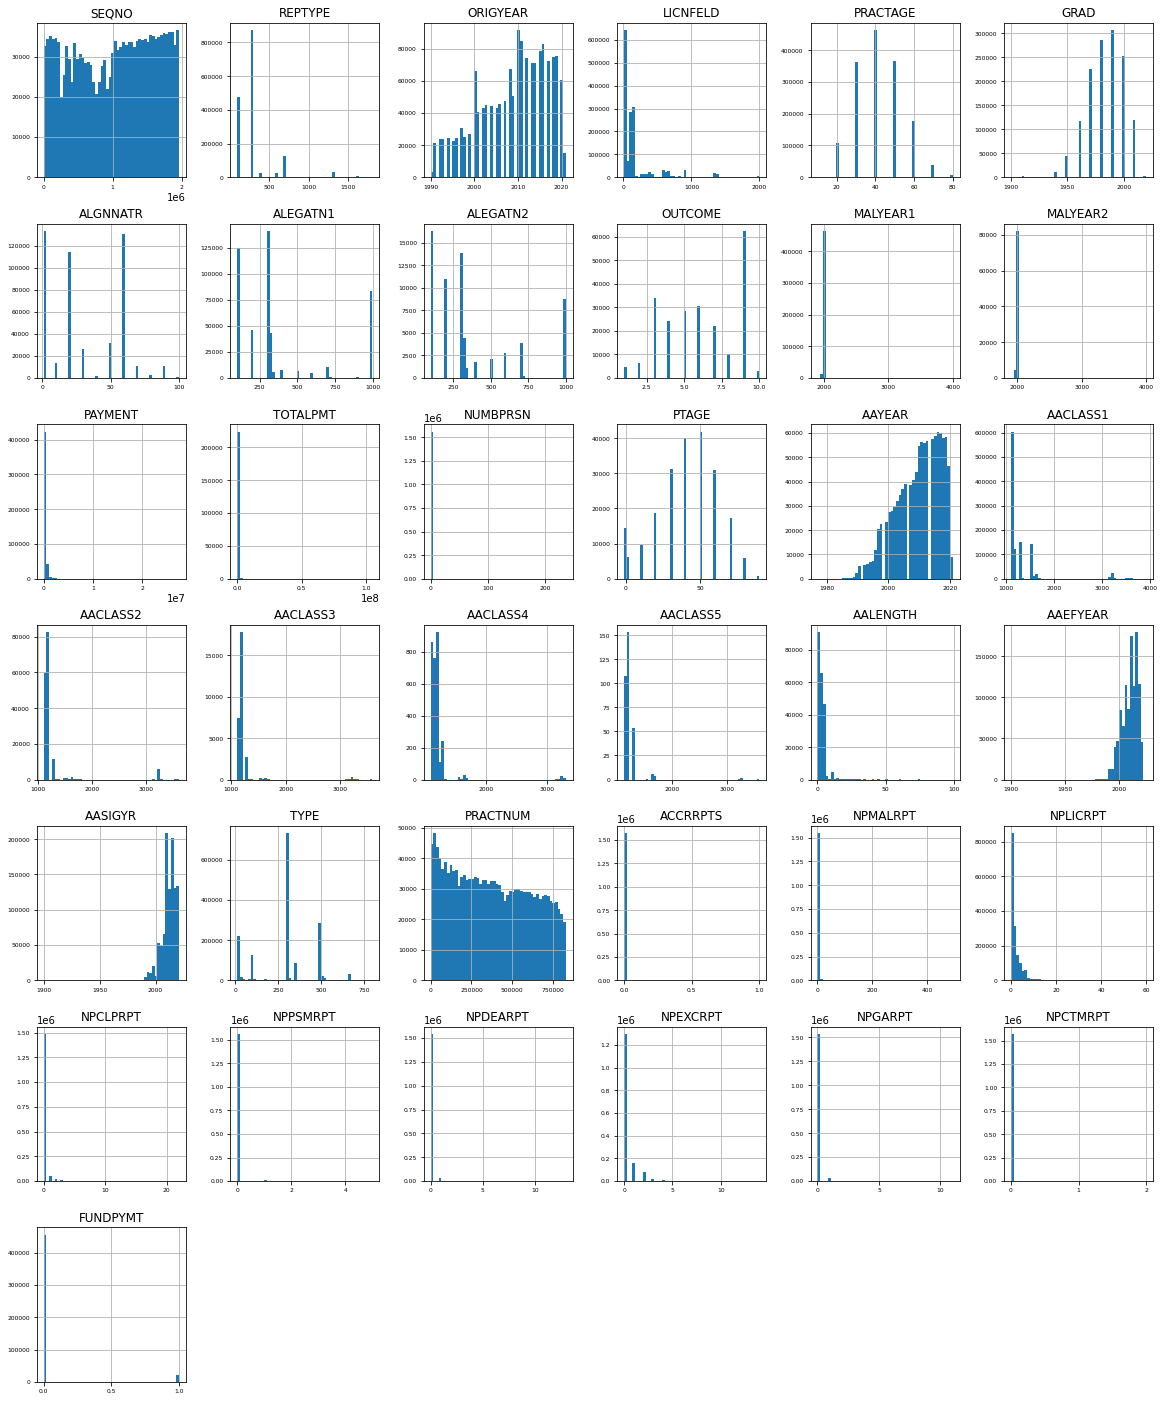

In [121]:
df.hist(figsize=(20, 25), bins=50, xlabelsize=6, ylabelsize=6)

### Payment
Refering to the *PublicUseDataFile-Format.pdf*, Payment is coded into ranges for data privacy.  It is using the midpoint, such as $300 for range $101 - $500, which is acceptable for further analysis. 

In [36]:
print(df['PAYMENT'].dtype, df['TOTALPMT'].dtype)
df[['PAYMENT', 'TOTALPMT']][df['RECTYPE'] == 'P']

object object


,PAYMENT,TOTALPMT
403233,$97500,$97500
403234,$125000,$125000
403236,$175000,$175000
403250,$77500,$77500
403252,$1500,$1500
...,...,...
1572121,$195000,$195000
1572124,$22500,$22500
1572141,$57500,$57500
1572147,$585000,$585000


However, because there is a dollar sign $ in these fields, loading the csv, pandas just automatically treat it as **'object'** (string) dtype. We can just convert it into **'float'** for analysis convenience. (Why **float** over **int**? because there are nan value cannot be convert into **int**)

In [41]:
df['PAYMENT'] = df['PAYMENT'].replace('[\$,]', '', regex=True).astype(float)
df['TOTALPMT'] = df['TOTALPMT'].replace('[\$,]', '', regex=True).astype(float)
df[['PAYMENT', 'TOTALPMT']][df['RECTYPE'] == 'P']

### Year

Just like the *PublicUseDataFile-Format.pdf* says, there could be Erroneous year such as *'1900'* in MALYEAR1, AAYEAR, etc.

We can visualize them using boxplot or histogram density

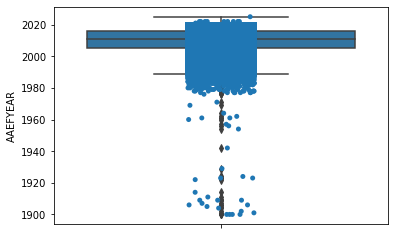

In [51]:
sns.boxplot(data = df, y = 'AAEFYEAR')
sns.stripplot(data = df, y = 'AAEFYEAR')

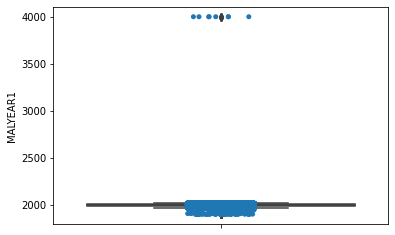

In [52]:
sns.boxplot(data = df, y = 'MALYEAR1')
sns.stripplot(data = df, y = 'MALYEAR1')

In [53]:
df[['MALYEAR1', 'ORIGYEAR', 'AAYEAR', 'AAEFYEAR']].describe()

,MALYEAR1,ORIGYEAR,AAYEAR,AAEFYEAR
count,476153.000,1572231.000,1095457.000,1095449.000
mean,1999.178,2008.815,2009.858,2009.787
std,12.310,7.889,7.198,7.144
min,1900.000,1990.000,1977.000,1900.000
25%,1992.000,2003.000,2005.000,2005.000
50%,1999.000,2010.000,2011.000,2011.000
75%,2006.000,2015.000,2016.000,2016.000
max,3999.000,2021.000,2021.000,2025.000


Let's assume years out of 1970-2021 are outliers

In [60]:
print(((df['MALYEAR1'] > 2021) | (df['MALYEAR1'] < 1970)).mean())
print(((df['AAEFYEAR'] > 2021) | (df['AAEFYEAR'] < 1970)).mean())

0.0005864278213570398
2.607759292368615e-05


Fine, there's really small percentage of Erroneous years

In the future, we may convert those erroneous year '1900', '3999', or maybe those '1920', '1931', outliers into NaN or perform other process, based on the model we use.

   

   ###    

Since there are so many columns in this dataset, I won't finish all those Analysis/Cleaning in this primitive EDA notebook. We can just perform similar analysis in the future. 

## Summary Statistics for claims

### Some basic metrics

We know that only 'P' and 'M' means Malpractice Payment. Let's see their payments characteristics

In [74]:
# [(df['RECTYPE'] == 'M') | (df['RECTYPE'] == 'P')] means only select Malpractice payments
posPct = (df['PAYMENT'][(df['RECTYPE'] == 'M') | (df['RECTYPE'] == 'P')] > 0).mean()
nonposPct = (df['PAYMENT'][(df['RECTYPE'] == 'M') | (df['RECTYPE'] == 'P')] <= 0).mean()
nanPct = df['PAYMENT'][(df['RECTYPE'] == 'M') | (df['RECTYPE'] == 'P')].isnull().mean()
print('positive Ratio:', posPct)
print('Non positive Ratio', nonposPct)
print('NaN Ratio:', nanPct)

positive Ratio: 0.9999454668249527
Non positive Ratio 0.0
NaN Ratio: 5.453317504729704e-05


Since almost all Malpractice Payment records (99.995%) have positive payments, I assume 'Claims Counts' is all records including 'Adverse Action', while non-zero claim counts means 'Malpractice Payment'. 

#### Claims counts

In [75]:
df['SEQNO'].count()

1572231

#### non-zero claim counts

In [78]:
(df['PAYMENT'] > 0).sum()

476748

#### average payout per claim count

In [80]:
df['PAYMENT'].sum() / df['SEQNO'].count()

72955.55579937044

#### average payout per non-zero claim count

In [83]:
# they are the same, because all non-null payment are positive
print(df['PAYMENT'].mean())
print(df['PAYMENT'].sum() / (df['PAYMENT'] > 0).sum())

240594.58340674738
240594.58340674738


#### payout rate(non-zero claim count/total claim count) 
by state, practitioner type and patient type as well as trends over time. 

##### By state

In [95]:
prSTATE = df.groupby('STATE')['PAYMENT'].count() / df.groupby('STATE')['SEQNO'].count()
print(prSTATE.sort_values())

STATE
AL   0.084
AR   0.115
OK   0.148
FM   0.154
VA   0.159
      ... 
PA   0.508
AS   0.517
DC   0.577
NY   0.617
PR   0.797
Length: 61, dtype: float64


Seems Puerto Rico (PR) has the highest payout rate(79.7%) while Alabama (AL) has the lowest payout rate(8.4%).  
The STATE really makes a difference here, maybe the court in different states have preference of adverse action over malpractice fine? 

I can convert the STATE **abbr code** into state **full name** if needed.  
Also, I can visualize it using a **colored map**.

##### By practitioner type

I suppose it's by LICNFELD(Practitioner's Field of License)

As Malpractice Allegation Group doesn't appear in adverse action, thus no "payout rate", however, I think this Group is still worthy.

In [96]:
prPracType = df.groupby('LICNFELD')['PAYMENT'].count() / df.groupby('LICNFELD')['SEQNO'].count()
print(prPracType.sort_values())

LICNFELD
1999   0.000
1338   0.000
1343   0.000
1399   0.000
1344   0.000
        ... 
120    0.853
505    0.929
630    0.962
35     0.963
653    1.000
Length: 162, dtype: float64


Surprise, Field 653 (Pastoral Counselor) have 100% payout rate. 
However, it only has 2 records. 

In [99]:
(df['LICNFELD']==653).sum()

2

We should filter the number of LICNFELD first, for meaningful analysis.

##### By patient type

In [103]:
prPtType = df.groupby('PTTYPE')['PAYMENT'].count() / df.groupby('PTTYPE')['SEQNO'].count()
print(prPtType.sort_values())

PTTYPE
B   1.000
I   1.000
O   1.000
U   1.000
dtype: float64


Whoops, all PTTYPE are for malpractice payment type records only. 

##### By Time

In [ ]:
# In the previous analysis, the ORIGYEAR is all within 1970-2021 range. So I just use it without filtering. (maybe we should filter outliers btw)
prOrigYear = df.groupby('ORIGYEAR')['PAYMENT'].count() / df.groupby('ORIGYEAR')['SEQNO'].count()
print(prOrigYear.sort_values())

In [109]:
prOrigYear

ORIGYEAR
1990   0.910
1991   0.837
1992   0.837
1993   0.826
1994   0.807
1995   0.793
1996   0.789
1997   0.590
1998   0.698
1999   0.693
2000   0.291
2001   0.505
2002   0.436
2003   0.421
2004   0.396
2005   0.397
2006   0.346
2007   0.306
2008   0.210
2009   0.275
2010   0.144
2011   0.152
2012   0.166
2013   0.178
2014   0.178
2015   0.154
2016   0.142
2017   0.164
2018   0.157
2019   0.154
2020   0.163
2021   0.148
dtype: float64

Seems that it's declining over time, and it is.

In [115]:
dfOrigYear = prOrigYear.reset_index()
dfOrigYear.rename(columns = {'ORIGYEAR':'Year', 0:'Ratio'}, inplace=True)
fig = px.line(dfOrigYear, x = 'Year', y = 'Ratio', title='Payout Ratio over time')
fig.show()

### Additional metrics

Somehow, I think payout rate(non-zero claim count/total claim count) doesn't matter that much.  
First, the dataset is record basis, not individual practitioner basis.  
Second, I'm not sure, is adverse action more serious than malpractice payment? 

Thus, I think, the average payment amount per non-zero claim is more important, especially for insurance purpose. 

In [104]:
print(df.groupby('STATE')['PAYMENT'].mean().sort_values())

STATE
PR     57221.906
MI    119973.266
CA    136597.879
KS    154191.606
AS    155916.667
         ...    
CT    388713.940
IL    397257.682
PW    545000.000
GU    566197.917
AA   1079375.000
Name: PAYMENT, Length: 61, dtype: float64


Now the state with highest average payment over malpractice is Armed Forces - Americas. I guess the military have more strict law and high welfare? 

For the features, 

instead of state, time, etc. Practioner age, patient age, gender is also worthy.

For the Explained variable，

the State Patient Compensation, etc., Fund Payment is also interesting, for insurance purpose.

## Correlation between payment and other variables

ValueError: ignored

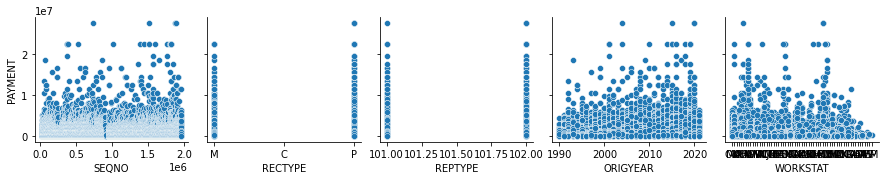

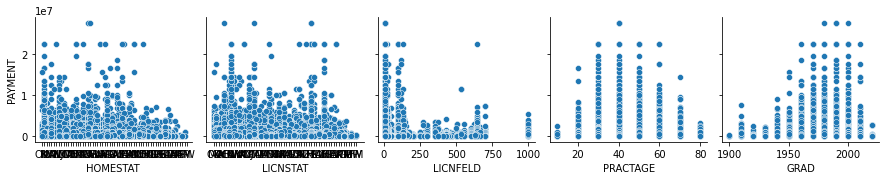

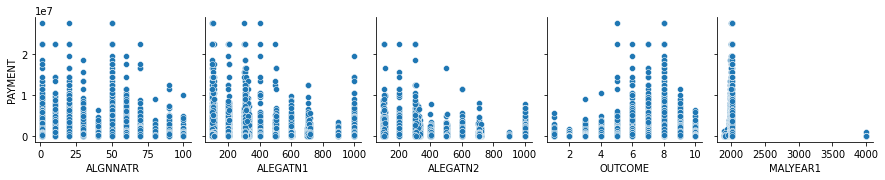

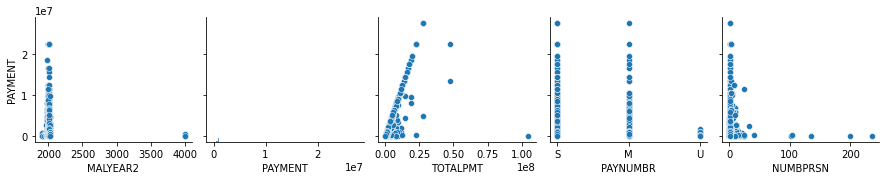

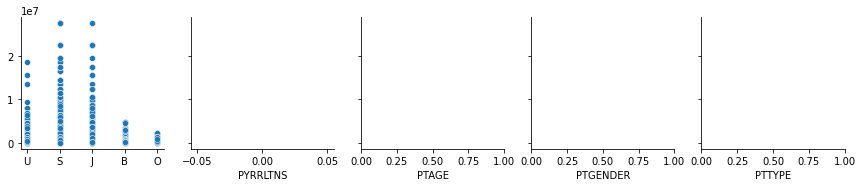

In [120]:
for i in range(0, len(df.columns), 5):
    sns.pairplot(data=df,
                 x_vars=df.columns[i:i+5],
                 y_vars=['PAYMENT'])

Require further analysis

# Future work
Just like I said in the beginning, this notebook is just a primitive EDA on NPDB public dataset.  

In the future, to further analysis the practitioner risk, I can perform tasks such as Machine Learning/Regression to estimate payment on various features(location, field, ...), integrating external data(like using CPI to adjust payment). 

Even for the EDA, we only compared payout rate according to states, practype, patient type, etc. We can also compare claims counts, average payout per claim count. 

It's better to estimate the risk if we can locate the individual level instead of case level. Or, at least, integrate the number of practitioner according to states, type, etc. Thus, we can have at least a estimation of risk on individual basis. 


Pay attention to *PublicUseDataFile-Format.pdf* for the features we used in analysis, which may create bias as they changed through time. 

## More data cleaning
First, supported by pandas, I can change those categorical **'object'** codes, like RECTYPE, LICNFELD, etc. into dtype **'category'**, such as *'A'* to *'old Adverse Action Report'*, which is both space efficient and easy understanding. 